### ✅ Step-by-Step ML Pipeline for Your Dataset
#### 🔧 Step 1: Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("preparation_before_the_exam.csv")

df["Did Practical Exercises"] = df["Practical Exercises"].map({"Yes": 1, "No": 0})

df.tail(5)

,Age,Study Time (h/day),Average sleep duration in hours,Practice Tests per Week,Food Quality,Practical Exercises,Average of latest practical exercises,Theoretical Exercises,Spaced Study,Motivation,Use of Study Techniques,Use of Distractions,Anxiety before the test,Performance (%),Did Practical Exercises
95,30,2,7,6,Media,No,NaN,Yes,Yes,Low,No,No,Media,80,0
96,24,7,7,1,Great,Yes,70.0,Yes,Yes,High,No,Yes,High,75,1
97,24,8,5,1,Good,Yes,80.0,Yes,Yes,High,Yes,Yes,Media,85,1
98,21,1,8,7,Great,Yes,75.0,Yes,No,Media,No,No,Low,80,1
99,20,5,8,7,Great,Yes,70.0,Yes,Yes,Media,No,Yes,Low,80,1


### 🧹 Step 2: Load & Preprocess the Data

In [3]:
# Instead of splitting the data, just print how many did vs didn't
print(f"Rows with practical exercises: {df['Did Practical Exercises'].sum()}")
print(f"Rows without practical exercises: {(df['Did Practical Exercises'] == 0).sum()}")

Rows with practical exercises: 53
Rows without practical exercises: 47


In [5]:
def preprocess(df):
    df = df.copy()

    # Fill missing practical exercise averages with 0 (for students who didn't do them)
    if "Average of latest practical exercises" in df.columns:
        df["Average of latest practical exercises"] = df["Average of latest practical exercises"].fillna(0)

    # Fill any other missing numeric values with 0
    df = df.fillna(0)

    # Encode categorical variables
    le = LabelEncoder()
    for col in df.select_dtypes(include=['object']):
        if col != "Practical Exercises":  # already replaced by the binary column
            df[col] = le.fit_transform(df[col].astype(str))

    # Drop target-independent column
    df = df.drop(columns=["Practical Exercises"], errors="ignore")

    return df

### 🎯 Step 3: Define Features and Target

In [6]:
def prepare_features(df):
    if len(df) < 2:
        raise ValueError(f"Not enough data to split. Only {len(df)} sample(s) available.")
    X = df.drop(columns=["Performance (%)"])
    y = df["Performance (%)"]
    return train_test_split(X, y, test_size=0.2, random_state=42)

### 🤖 Step 4: Train and Compare Models

In [7]:
def train_and_evaluate(X_train, X_test, y_train, y_test, model, model_name="Model"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name} R2 Score: {r2_score(y_test, y_pred):.2f}")
    print(f"{model_name} MSE: {mean_squared_error(y_test, y_pred):.2f}")
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{model_name} Prediction vs Reality")
    plt.show()

### 🧪 Step 5: Run for Both Groups

Linear Regression - All R2 Score: 0.65
Linear Regression - All MSE: 53.95


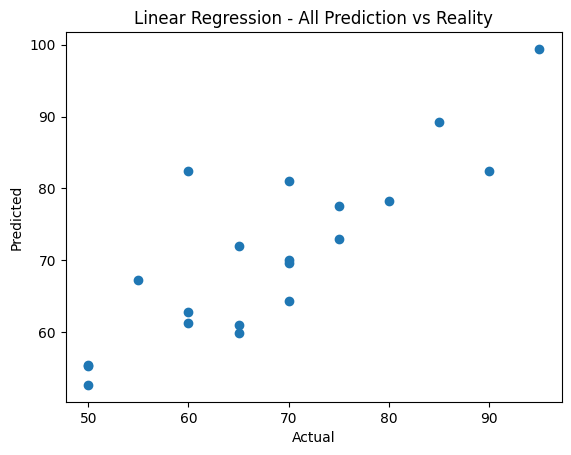

Random Forest - All R2 Score: 0.56
Random Forest - All MSE: 68.74


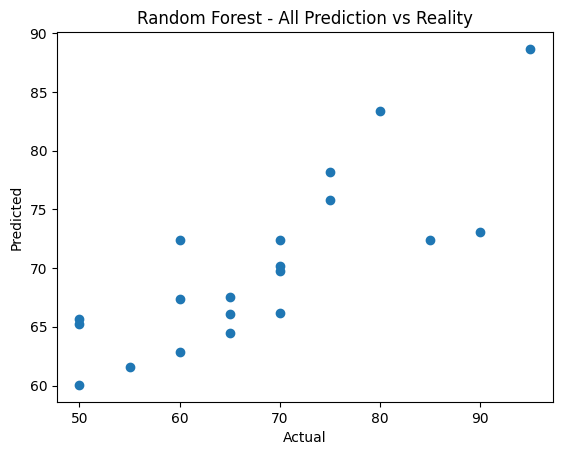

In [8]:
# Process the entire dataset
df_processed = preprocess(df)
X_train, X_test, y_train, y_test = prepare_features(df_processed)

# Train and evaluate on all students
train_and_evaluate(X_train, X_test, y_train, y_test, LinearRegression(), "Linear Regression - All")
train_and_evaluate(X_train, X_test, y_train, y_test, RandomForestRegressor(random_state=42), "Random Forest - All")

In [9]:
print("Expected input columns:", list(X_train.columns))

Expected input columns: ['Age', 'Study Time (h/day)', 'Average sleep duration in hours', 'Practice Tests per Week', 'Food Quality', 'Average of latest practical exercises', 'Theoretical Exercises', 'Spaced Study', 'Motivation', 'Use of Study Techniques', 'Use of Distractions', 'Anxiety before the test', 'Did Practical Exercises']


In [10]:
new_student = {
    "Age": 20,
    "Study Time (h/day)": 4,
    "Average sleep duration in hours": 7,
    "Practice Tests per Week": 4,
    "Food Quality": "Good",
    "Theoretical Exercises": "Yes",
    "Spaced Study": "Yes",
    "Motivation": "High",
    "Use of Study Techniques": "Yes",
    "Use of Distractions": "No",
    "Anxiety before the test": "Low",
    "Average of latest practical exercises": 70,
    "Did Practical Exercises": 1,
}

# Turn it into a DataFrame
new_df = pd.DataFrame([new_student])

# Preprocess it
new_df_processed = preprocess(new_df)

# Ensure it has same columns and order as training data
missing_cols = set(X_train.columns) - set(new_df_processed.columns)
for col in missing_cols:
    new_df_processed[col] = 0  # Fill missing ones with default 0
new_df_processed = new_df_processed[X_train.columns]

# Predict using a trained model
model = LinearRegression()
model.fit(X_train, y_train)
predicted_score = model.predict(new_df_processed)[0]
print(f"🎯 Predicted Performance: {predicted_score:.2f}%")

🎯 Predicted Performance: 68.68%
